In [1]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
a=tf.random.uniform([2,3],0,1)
print(a)
print(type(a))
n=np.random.uniform(0,1,[2,3])
print(n)
print(type(n))

2.12.0
tf.Tensor(
[[0.3020091  0.6317934  0.20749366]
 [0.6688627  0.97058165 0.36773074]], shape=(2, 3), dtype=float32)
<class 'tensorflow.python.framework.ops.EagerTensor'>
[[0.49165988 0.04677427 0.37183637]
 [0.6360968  0.5999339  0.40930036]]
<class 'numpy.ndarray'>


In [ ]:
import tensorflow as tf
import numpy as np

t=tf.random.uniform([2,3],0,1)
n=np.random.uniform(0,1,[2,3])
print("tensorflow로 생성한 텐서:\n",t,"\n")
print("numpy로 생성한 ndarray:\n",n,"\n")

res=t+n # 텐서 t와 ndarray n의 덧셈
print("덧셈 결과:\n",res)

tensorflow로 생성한 텐서:
 tf.Tensor(
[[0.63986826 0.826934   0.75431025]
 [0.17950177 0.7072567  0.32169628]], shape=(2, 3), dtype=float32) 

numpy로 생성한 ndarray:
 [[0.58702673 0.54613724 0.08093838]
 [0.70640423 0.36743047 0.74905152]] 

덧셈 결과:
 tf.Tensor(
[[1.226895   1.3730712  0.83524865]
 [0.885906   1.0746871  1.0707479 ]], shape=(2, 3), dtype=float32)


In [2]:
import tensorflow as tf
import tensorflow.keras.datasets as ds

# MNIST 읽고 텐서 모양 출력
(x_train, y_train),(x_test, y_test)=ds.mnist.load_data()
yy_train=tf.one_hot(y_train,10,dtype=tf.int8) # 원핫 코드로 변환
print("MNIST: ",x_train.shape,y_train.shape,yy_train.shape)

# CIFAR-10 읽고 텐서 모양 출력
(x_train,y_train),(x_test,y_test)=ds.cifar10.load_data()
yy_train=tf.one_hot(y_train,10,dtype=tf.int8)
print("CIFAR-10: ",x_train.shape,y_train.shape,yy_train.shape)

# Boston Housing 읽고 텐서 모양 출력
(x_train,y_train),(x_test,y_test)=ds.boston_housing.load_data()
print("Boston Housing: ",x_train.shape,y_train.shape)

# Reuters 읽고 텐서 모양 출력
(x_train,y_train),(x_test,y_test)=ds.reuters.load_data()
print("Reuters: ",x_train.shape,y_train.shape)

11490434/11490434 [==============================] - 0s 0us/step
MNIST:  (60000, 28, 28) (60000,) (60000, 10)
170498071/170498071 [==============================] - 4s 0us/step
CIFAR-10:  (50000, 32, 32, 3) (50000, 1) (50000, 1, 10)
57026/57026 [==============================] - 0s 0us/step
Boston Housing:  (404, 13) (404,)
2110848/2110848 [==============================] - 0s 0us/step
Reuters:  (8982,) (8982,)


In [3]:
import tensorflow as tf

# OR 데이터 구축
x=[[0.0,0.0],[0.0,1.0],[1.0,0.0],[1.0,1.0]]
y=[[-1],[1],[1],[1]]

# 퍼셉트론
w=tf.Variable([[1.0],[1.0]])
b=tf.Variable(-0.5)

# 퍼셉트론 동작
s=tf.add(tf.matmul(x,w),b)
o=tf.sign(s)

print(o)

tf.Tensor(
[[-1.]
 [ 1.]
 [ 1.]
 [ 1.]], shape=(4, 1), dtype=float32)


In [5]:
import tensorflow as tf

# OR 데이터 구축
x=[[0.0,0.0],[0.0,1.0],[1.0,0.0],[1.0,1.0]]
y=[[-1],[1],[1],[1]]

# 가중치 초기화
w=tf.Variable(tf.random.uniform([2,1],-0.5,0.5))
b=tf.Variable(tf.zeros([1]))

# 옵티마이저
opt=tf.keras.optimizers.SGD(learning_rate=0.1)

# 전방 계산
def forward():
    s=tf.add(tf.matmul(x,w),b)
    o=tf.tanh(s)
    return o

# 손실 함수 정의
def loss():
    o=forward()
    return tf.reduce_mean((y-o)**2)

# 500세대까지 학습(100세대마다 학습 정보 출력)
for i in range(500):
    opt.minimize(loss, var_list=[w,b])
    if(i%100==0): print('loss at epoch',i,'=',loss().numpy())

# 학습된 퍼셉트론으로 OR 데이터를 예측
o=forward()
print(o)

loss at epoch 0 = 0.94155896
loss at epoch 100 = 0.09346349
loss at epoch 200 = 0.042733178
loss at epoch 300 = 0.026772834
loss at epoch 400 = 0.019248175
tf.Tensor(
[[-0.8158468]
 [ 0.8861499]
 [ 0.8860135]
 [ 0.9992603]], shape=(4, 1), dtype=float32)


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# OR 데이터 구축
x=[[0.0,0.0],[0.0,1.0],[1.0,0.0],[1.0,1.0]]
y=[[-1],[1],[1],[1]]

n_input=2
n_output=1

perceptron=Sequential()
perceptron.add(Dense(units=n_output,activation='tanh',input_shape=(n_input,),kernel_initializer='random_uniform',bias_initializer='zeros'))

perceptron.compile(loss='mse',optimizer=SGD(learning_rate=0.1),metrics=['mse'])
perceptron.fit(x,y,epochs=500,verbose=2)

res=perceptron.predict(x)
print(res)

Epoch 1/500
1/1 - 0s - loss: 1.0464 - mse: 1.0464 - 487ms/epoch - 487ms/step
Epoch 2/500
1/1 - 0s - loss: 0.7758 - mse: 0.7758 - 9ms/epoch - 9ms/step
Epoch 3/500
1/1 - 0s - loss: 0.6556 - mse: 0.6556 - 9ms/epoch - 9ms/step
Epoch 4/500
1/1 - 0s - loss: 0.5980 - mse: 0.5980 - 7ms/epoch - 7ms/step
Epoch 5/500
1/1 - 0s - loss: 0.5638 - mse: 0.5638 - 8ms/epoch - 8ms/step
Epoch 6/500
1/1 - 0s - loss: 0.5397 - mse: 0.5397 - 11ms/epoch - 11ms/step
Epoch 7/500
1/1 - 0s - loss: 0.5205 - mse: 0.5205 - 8ms/epoch - 8ms/step
Epoch 8/500
1/1 - 0s - loss: 0.5039 - mse: 0.5039 - 8ms/epoch - 8ms/step
Epoch 9/500
1/1 - 0s - loss: 0.4888 - mse: 0.4888 - 8ms/epoch - 8ms/step
Epoch 10/500
1/1 - 0s - loss: 0.4748 - mse: 0.4748 - 7ms/epoch - 7ms/step
Epoch 11/500
1/1 - 0s - loss: 0.4615 - mse: 0.4615 - 9ms/epoch - 9ms/step
Epoch 12/500
1/1 - 0s - loss: 0.4488 - mse: 0.4488 - 11ms/epoch - 11ms/step
Epoch 13/500
1/1 - 0s - loss: 0.4366 - mse: 0.4366 - 11ms/epoch - 11ms/step
Epoch 14/500
1/1 - 0s - loss: 0.4248 

Epoch 1/30
469/469 - 11s - loss: 0.0421 - accuracy: 0.8471 - val_loss: 0.0271 - val_accuracy: 0.9181 - 11s/epoch - 23ms/step
Epoch 2/30
469/469 - 8s - loss: 0.0222 - accuracy: 0.9306 - val_loss: 0.0177 - val_accuracy: 0.9453 - 8s/epoch - 17ms/step
Epoch 3/30
469/469 - 10s - loss: 0.0165 - accuracy: 0.9496 - val_loss: 0.0146 - val_accuracy: 0.9533 - 10s/epoch - 21ms/step
Epoch 4/30
469/469 - 10s - loss: 0.0138 - accuracy: 0.9586 - val_loss: 0.0128 - val_accuracy: 0.9577 - 10s/epoch - 21ms/step
Epoch 5/30
469/469 - 8s - loss: 0.0120 - accuracy: 0.9639 - val_loss: 0.0119 - val_accuracy: 0.9622 - 8s/epoch - 17ms/step
Epoch 6/30
469/469 - 10s - loss: 0.0109 - accuracy: 0.9686 - val_loss: 0.0107 - val_accuracy: 0.9659 - 10s/epoch - 21ms/step
Epoch 7/30
469/469 - 9s - loss: 0.0100 - accuracy: 0.9714 - val_loss: 0.0104 - val_accuracy: 0.9678 - 9s/epoch - 19ms/step
Epoch 8/30
469/469 - 9s - loss: 0.0094 - accuracy: 0.9743 - val_loss: 0.0099 - val_accuracy: 0.9692 - 9s/epoch - 19ms/step
Epoch 9/

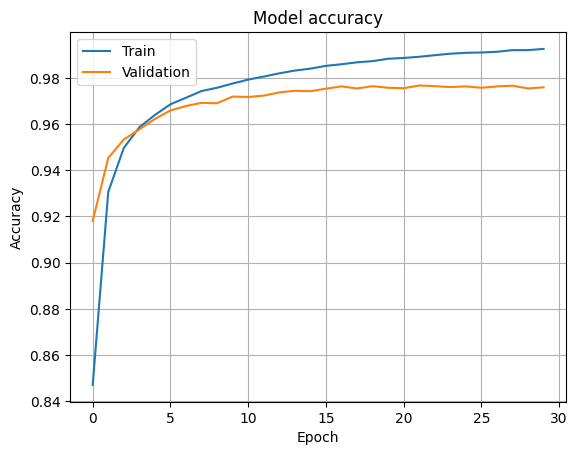

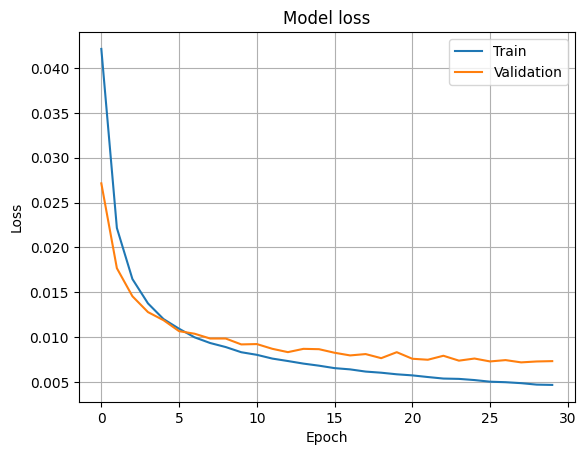

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# MNIST 읽어 와서 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000,784) # 텐서 모양 변환
x_test = x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0 # ndarray로 변환
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10) # 원핫 코드로 변환
y_test=tf.keras.utils.to_categorical(y_test,10)

n_input=784
n_hidden=1024
n_output=10

mlp=Sequential()
mlp.add(Dense(units=n_hidden,activation='tanh',input_shape=(n_input,),kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_output,activation='tanh',kernel_initializer='random_uniform',bias_initializer='zeros'))

mlp.compile(loss='mean_squared_error',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
hist=mlp.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

res=mlp.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)
import matplotlib.pyplot as plt

# 정확률 곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.grid()
plt.show()

# 손실 함수 곡선
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper right')
plt.grid()
plt.show()

4422102/4422102 [==============================] - 1s 0us/step
Epoch 1/30
469/469 - 3s - loss: 0.0877 - accuracy: 0.4809 - val_loss: 0.0318 - val_accuracy: 0.8290 - 3s/epoch - 6ms/step
Epoch 2/30
469/469 - 1s - loss: 0.0304 - accuracy: 0.8431 - val_loss: 0.0306 - val_accuracy: 0.8367 - 1s/epoch - 3ms/step
Epoch 3/30
469/469 - 1s - loss: 0.0269 - accuracy: 0.8569 - val_loss: 0.0269 - val_accuracy: 0.8514 - 1s/epoch - 3ms/step
Epoch 4/30
469/469 - 1s - loss: 0.0252 - accuracy: 0.8674 - val_loss: 0.0249 - val_accuracy: 0.8549 - 1s/epoch - 3ms/step
Epoch 5/30
469/469 - 1s - loss: 0.0237 - accuracy: 0.8741 - val_loss: 0.0235 - val_accuracy: 0.8656 - 1s/epoch - 3ms/step
Epoch 6/30
469/469 - 1s - loss: 0.0225 - accuracy: 0.8801 - val_loss: 0.0232 - val_accuracy: 0.8656 - 1s/epoch - 3ms/step
Epoch 7/30
469/469 - 1s - loss: 0.0216 - accuracy: 0.8854 - val_loss: 0.0234 - val_accuracy: 0.8700 - 1s/epoch - 3ms/step
Epoch 8/30
469/469 - 1s - loss: 0.0209 - accuracy: 0.8902 - val_loss: 0.0231 - val_

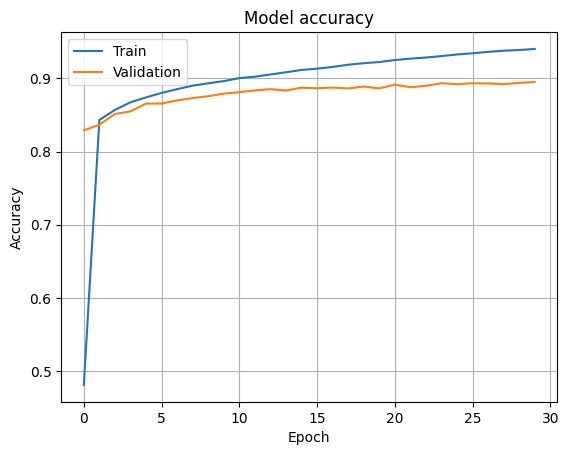

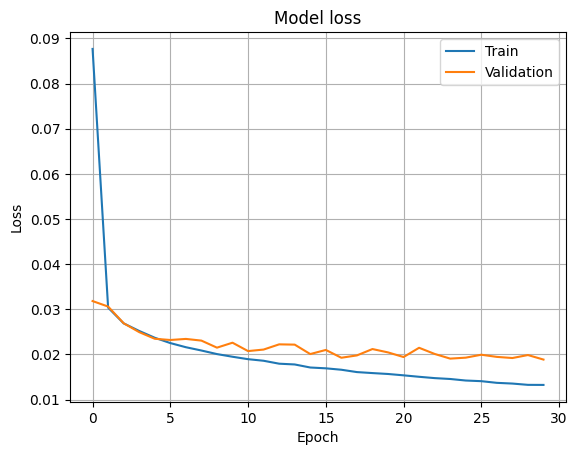

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# fashion MNIST 데이터셋을 읽어와 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(60000,784) # 텐서 모양 변환
x_test = x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0 # ndarray로 변환
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10) # 원핫 코드로 변환
y_test=tf.keras.utils.to_categorical(y_test,10)

n_input=784
n_hidden=1024
n_output=10

mlp=Sequential()
mlp.add (Dense(units=n_hidden,activation='tanh',input_shape=(n_input,),kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_output,activation='tanh',kernel_initializer='random_uniform',bias_initializer='zeros'))

mlp.compile(loss='mean_squared_error',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
hist=mlp.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

res=mlp.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)
import matplotlib.pyplot as plt

# 정확률 곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.grid()
plt.show()

# 손실 함수 곡선
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper right')
plt.grid()
plt.show()

Epoch 1/30
469/469 - 4s - loss: 0.0263 - accuracy: 0.8962 - val_loss: 0.0126 - val_accuracy: 0.9457 - 4s/epoch - 8ms/step
Epoch 2/30
469/469 - 2s - loss: 0.0100 - accuracy: 0.9530 - val_loss: 0.0077 - val_accuracy: 0.9629 - 2s/epoch - 3ms/step
Epoch 3/30
469/469 - 2s - loss: 0.0067 - accuracy: 0.9679 - val_loss: 0.0070 - val_accuracy: 0.9644 - 2s/epoch - 5ms/step
Epoch 4/30
469/469 - 2s - loss: 0.0052 - accuracy: 0.9752 - val_loss: 0.0056 - val_accuracy: 0.9727 - 2s/epoch - 3ms/step
Epoch 5/30
469/469 - 2s - loss: 0.0043 - accuracy: 0.9798 - val_loss: 0.0047 - val_accuracy: 0.9762 - 2s/epoch - 3ms/step
Epoch 6/30
469/469 - 1s - loss: 0.0037 - accuracy: 0.9827 - val_loss: 0.0054 - val_accuracy: 0.9730 - 1s/epoch - 3ms/step
Epoch 7/30
469/469 - 2s - loss: 0.0032 - accuracy: 0.9857 - val_loss: 0.0047 - val_accuracy: 0.9759 - 2s/epoch - 3ms/step
Epoch 8/30
469/469 - 2s - loss: 0.0029 - accuracy: 0.9870 - val_loss: 0.0045 - val_accuracy: 0.9757 - 2s/epoch - 3ms/step
Epoch 9/30
469/469 - 2s 

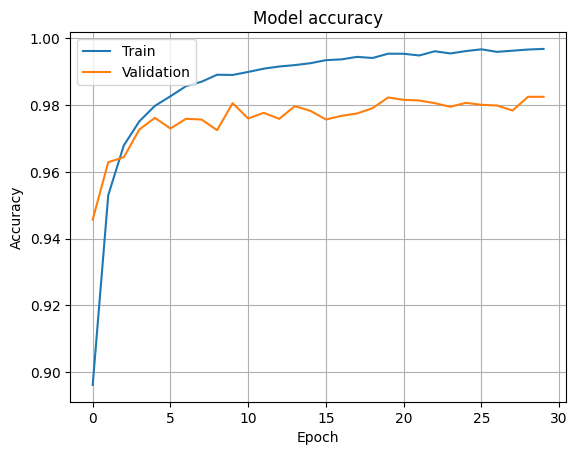

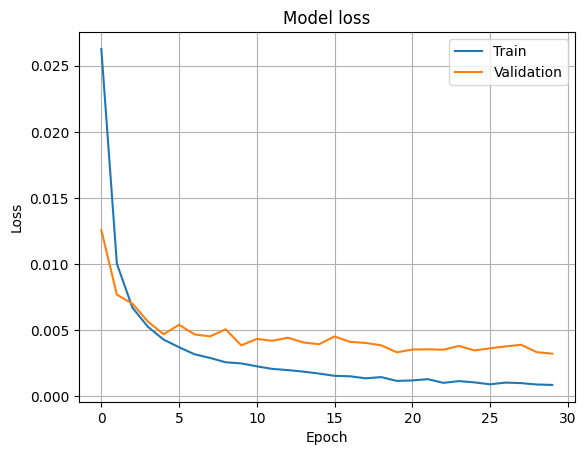

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# MNIST 읽어 와서 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000,784) # 텐서 모양 변환
x_test = x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0 # ndarray로 변환
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10) # 원핫 코드로 변환
y_test=tf.keras.utils.to_categorical(y_test,10)

# 신경망 구조 설정
n_input=784
n_hidden1=1024
n_hidden2=512
n_hidden3=512
n_hidden4=512
n_output=10

# 신경망 구조 설계
mlp=Sequential()
mlp.add(Dense(units=n_hidden1,activation='tanh',input_shape=(n_input,),kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_hidden2,activation='tanh',kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_hidden3,activation='tanh',kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_hidden4,activation='tanh',kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_output,activation='tanh',kernel_initializer='random_uniform',bias_initializer='zeros'))

# 신경망 학습
mlp.compile(loss='mean_squared_error',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
hist=mlp.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

# 신경망의 정확률 측정
res=mlp.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

import matplotlib.pyplot as plt

# 정확률 곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.grid()
plt.show()

# 손실 함수 곡선
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper right')
plt.grid()
plt.show()

Epoch 1/30
469/469 - 4s - loss: 0.0161 - accuracy: 0.8954 - val_loss: 0.0112 - val_accuracy: 0.9274 - 4s/epoch - 9ms/step
Epoch 2/30
469/469 - 2s - loss: 0.0096 - accuracy: 0.9375 - val_loss: 0.0083 - val_accuracy: 0.9475 - 2s/epoch - 4ms/step
Epoch 3/30
469/469 - 2s - loss: 0.0073 - accuracy: 0.9532 - val_loss: 0.0068 - val_accuracy: 0.9550 - 2s/epoch - 4ms/step
Epoch 4/30
469/469 - 2s - loss: 0.0059 - accuracy: 0.9627 - val_loss: 0.0059 - val_accuracy: 0.9620 - 2s/epoch - 4ms/step
Epoch 5/30
469/469 - 2s - loss: 0.0049 - accuracy: 0.9693 - val_loss: 0.0052 - val_accuracy: 0.9669 - 2s/epoch - 4ms/step
Epoch 6/30
469/469 - 2s - loss: 0.0042 - accuracy: 0.9745 - val_loss: 0.0049 - val_accuracy: 0.9683 - 2s/epoch - 5ms/step
Epoch 7/30
469/469 - 2s - loss: 0.0036 - accuracy: 0.9787 - val_loss: 0.0046 - val_accuracy: 0.9699 - 2s/epoch - 5ms/step
Epoch 8/30
469/469 - 2s - loss: 0.0031 - accuracy: 0.9813 - val_loss: 0.0041 - val_accuracy: 0.9736 - 2s/epoch - 3ms/step
Epoch 9/30
469/469 - 2s 

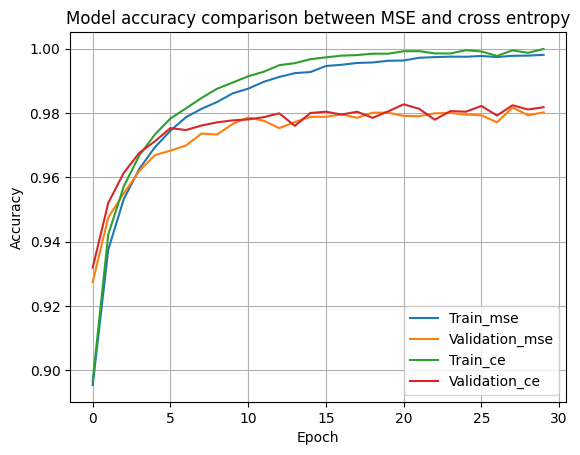

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# MNIST 읽어 와서 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# 신경망 구조 설정
n_input=784
n_hidden1=1024
n_hidden2=512
n_hidden3=512
n_hidden4=512
n_output=10

# 평균제곱오차를 사용한 모델
dmlp_mse=Sequential()
dmlp_mse.add(Dense(units=n_hidden1,activation='tanh',input_shape=(n_input,)))
dmlp_mse.add(Dense(units=n_hidden2,activation='tanh'))
dmlp_mse.add(Dense(units=n_hidden3,activation='tanh'))
dmlp_mse.add(Dense(units=n_hidden4,activation='tanh'))
dmlp_mse.add(Dense(units=n_output,activation='softmax'))
dmlp_mse.compile(loss='mean_squared_error',optimizer=Adam(learning_rate=0.0001),metrics=['accuracy'])
hist_mse=dmlp_mse.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

# 교차 엔트로피를 사용한 모델
dmlp_ce=Sequential()
dmlp_ce.add(Dense(units=n_hidden1,activation='tanh',input_shape=(n_input,)))
dmlp_ce.add(Dense(units=n_hidden2,activation='tanh'))
dmlp_ce.add(Dense(units=n_hidden3,activation='tanh'))
dmlp_ce.add(Dense(units=n_hidden4,activation='tanh'))
dmlp_ce.add (Dense(units=n_output,activation='softmax'))
dmlp_ce.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.0001),metrics=['accuracy'])
hist_ce=dmlp_ce.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

# 두 모델의 정확률 비교
res_mse=dmlp_mse.evaluate(x_test,y_test,verbose=0)
print("평균제곱오차의 정확률은",res_mse[1]*100)
res_ce=dmlp_ce.evaluate(x_test,y_test,verbose=0)
print("교차 엔트로피의 정확률은",res_ce[1]*100)

# 하나의 그래프에서 두 모델을 비교
import matplotlib.pyplot as plt
plt.plot(hist_mse.history['accuracy'])
plt.plot(hist_mse.history['val_accuracy'])
plt.plot(hist_ce.history['accuracy'])
plt.plot(hist_ce.history['val_accuracy'])
plt.title('Model accuracy comparison between MSE and cross entropy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train_mse','Validation_mse','Train_ce','Validation_ce'], loc='best')
plt.grid()
plt.show()

Epoch 1/50
235/235 - 3s - loss: 1.3417 - accuracy: 0.6302 - val_loss: 0.8428 - val_accuracy: 0.7108 - 3s/epoch - 11ms/step
Epoch 2/50
235/235 - 1s - loss: 0.7206 - accuracy: 0.7543 - val_loss: 0.6599 - val_accuracy: 0.7737 - 905ms/epoch - 4ms/step
Epoch 3/50
235/235 - 1s - loss: 0.6038 - accuracy: 0.7949 - val_loss: 0.6090 - val_accuracy: 0.7825 - 891ms/epoch - 4ms/step
Epoch 4/50
235/235 - 1s - loss: 0.5462 - accuracy: 0.8126 - val_loss: 0.8257 - val_accuracy: 0.7301 - 873ms/epoch - 4ms/step
Epoch 5/50
235/235 - 1s - loss: 0.5126 - accuracy: 0.8224 - val_loss: 0.5448 - val_accuracy: 0.8086 - 888ms/epoch - 4ms/step
Epoch 6/50
235/235 - 1s - loss: 0.4856 - accuracy: 0.8316 - val_loss: 0.5326 - val_accuracy: 0.8139 - 868ms/epoch - 4ms/step
Epoch 7/50
235/235 - 1s - loss: 0.4672 - accuracy: 0.8369 - val_loss: 0.6010 - val_accuracy: 0.7860 - 890ms/epoch - 4ms/step
Epoch 8/50
235/235 - 1s - loss: 0.4576 - accuracy: 0.8403 - val_loss: 0.5222 - val_accuracy: 0.8095 - 893ms/epoch - 4ms/step
Ep

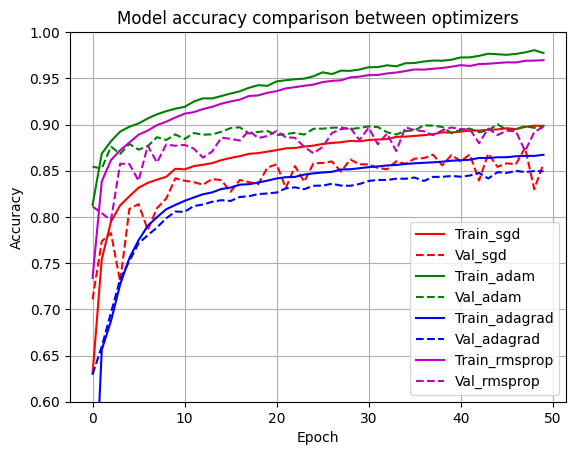

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD,Adam,Adagrad,RMSprop

# fashion MNIST 읽어 와서 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# 신경망 구조 설정
n_input=784
n_hidden1=1024
n_hidden2=512
n_hidden3=512
n_hidden4=512
n_output=10

# 하이퍼 매개변수 설정
batch_siz=256
n_epoch=50

# 모델을 설계해주는 함수(모델을 나타내는 객체 model을 반환)
def build_model():
    model=Sequential()
    model.add(Dense(units=n_hidden1,activation='relu',input_shape=(n_input,)))
    model.add(Dense(units=n_hidden2,activation='relu'))
    model.add(Dense(units=n_hidden3,activation='relu'))
    model.add(Dense(units=n_hidden4,activation='relu'))
    model.add(Dense(units=n_output,activation='softmax'))
    return model

# SGD 옵티마이저를 사용하는 모델
dmlp_sgd=build_model()
dmlp_sgd.compile(loss='categorical_crossentropy',optimizer=SGD(),metrics=['accuracy'])
hist_sgd=dmlp_sgd.fit(x_train,y_train,batch_size=batch_siz,epochs=n_epoch,validation_data=(x_test,y_test),verbose=2)

# Adam 옵티마이저를 사용하는 모델
dmlp_adam=build_model()
dmlp_adam.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist_adam=dmlp_adam.fit(x_train,y_train,batch_size=batch_siz,epochs=n_epoch,validation_data=(x_test,y_test),verbose=2)

# Adagrad 옵티마이저를 사용하는 모델
dmlp_adagrad=build_model()
dmlp_adagrad.compile(loss='categorical_crossentropy',optimizer=Adagrad(),metrics=['accuracy'])
hist_adagrad=dmlp_adagrad.fit(x_train,y_train,batch_size=batch_siz,epochs=n_epoch,validation_data=(x_test,y_test),verbose=2)

# RMSprop 옵티마이저를 사용하는 모델
dmlp_rmsprop=build_model()
dmlp_rmsprop.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])
hist_rmsprop=dmlp_rmsprop.fit(x_train,y_train,batch_size=batch_siz,epochs=n_epoch,validation_data=(x_test,y_test),verbose=2)

# 네 모델의 정확률을 출력
print("SGD 정확률은",dmlp_sgd.evaluate(x_test,y_test,verbose=0)[1]*100)
print("Adam 정확률은",dmlp_adam.evaluate(x_test,y_test,verbose=0)[1]*100)
print("Adagrad 정확률은",dmlp_adagrad.evaluate(x_test,y_test,verbose=0)[1]*100)
print("RMSprop 정확률은",dmlp_rmsprop.evaluate(x_test,y_test,verbose=0)[1]*100)

import matplotlib.pyplot as plt

# 네 모델의 정확률을 하나의 그래프에서 비교
plt.plot(hist_sgd.history['accuracy'],'r')
plt.plot(hist_sgd.history['val_accuracy'],'r--')
plt.plot(hist_adam.history['accuracy'],'g')
plt.plot(hist_adam.history['val_accuracy'],'g--')
plt.plot(hist_adagrad.history['accuracy'],'b')
plt.plot(hist_adagrad.history['val_accuracy'],'b--')
plt.plot(hist_rmsprop.history['accuracy'],'m')
plt.plot(hist_rmsprop.history['val_accuracy'],'m--')
plt.title('Model accuracy comparison between optimizers')
plt.ylim((0.6,1.0))
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train_sgd','Val_sgd','Train_adam','Val_adam','Train_adagrad','Val_adagrad','Train_rmsprop','Val_rmsprop'], loc='best')
plt.grid()
plt.show()